In [ ]:
# AW 7/10/2025
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time as time
from collections import Counter,defaultdict
from sklearn.decomposition import PCA

df = pd.read_csv(".//ieee-fraud-detection//train_transaction.csv")
# setting df to be the features only
df = df.iloc[:,17:]

In [2]:
# M4 column has weird values [M0,M1,M2],replacing with [0,1,2]
# The remaining M1-M9 columns have T/F values replacing with 1/0
# define a dictionary as a mapping function
replace_mapping = {'F':0,'T':1,'M0':0,'M1':1,'M2':2}
# replace each column with replaced values
for i in range(9):
    df['M'+str(i+1)] = df['M'+str(i+1)].map(replace_mapping)

# checking that everything is a float
# nothing should print
for i in df:
    if df[i].dtypes!=np.float64:
        print(i)

In [3]:
# counting NaNs
data_columns = dict(df.isnull().sum())
print('Number of columns: ',len(data_columns))
print('Count of NaN of each column')
print(data_columns)

Number of columns:  377
Count of NaN of each column
{'C1': 0, 'C2': 0, 'C3': 0, 'C4': 0, 'C5': 0, 'C6': 0, 'C7': 0, 'C8': 0, 'C9': 0, 'C10': 0, 'C11': 0, 'C12': 0, 'C13': 0, 'C14': 0, 'D1': 1269, 'D2': 280797, 'D3': 262878, 'D4': 168922, 'D5': 309841, 'D6': 517353, 'D7': 551623, 'D8': 515614, 'D9': 515614, 'D10': 76022, 'D11': 279287, 'D12': 525823, 'D13': 528588, 'D14': 528353, 'D15': 89113, 'M1': 271100, 'M2': 271100, 'M3': 271100, 'M4': 281444, 'M5': 350482, 'M6': 169360, 'M7': 346265, 'M8': 346252, 'M9': 346252, 'V1': 279287, 'V2': 279287, 'V3': 279287, 'V4': 279287, 'V5': 279287, 'V6': 279287, 'V7': 279287, 'V8': 279287, 'V9': 279287, 'V10': 279287, 'V11': 279287, 'V12': 76073, 'V13': 76073, 'V14': 76073, 'V15': 76073, 'V16': 76073, 'V17': 76073, 'V18': 76073, 'V19': 76073, 'V20': 76073, 'V21': 76073, 'V22': 76073, 'V23': 76073, 'V24': 76073, 'V25': 76073, 'V26': 76073, 'V27': 76073, 'V28': 76073, 'V29': 76073, 'V30': 76073, 'V31': 76073, 'V32': 76073, 'V33': 76073, 'V34': 76073, 

In [4]:
# grouping columns by NaN count
columns_null_count = defaultdict(list)
for key,val in data_columns.items():
    columns_null_count[val].append(key)

count_list = sorted(list(columns_null_count.keys()))
print('Number of different NaN: ',len(count_list))

Number of different NaN:  34


Text(0.5, 1.0, 'Distribution of NaNs in the Columns')

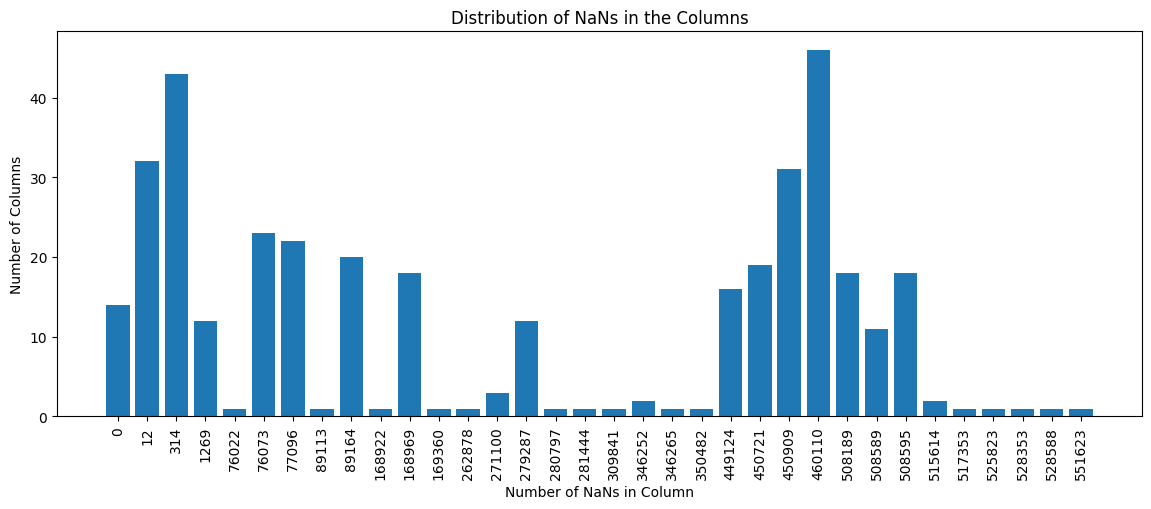

In [5]:
# making the historgram of the distribution
NaN_count = {}
for count,names in sorted(columns_null_count.items()):
    NaN_count[str(count)] = len(names)

    
plt.rcParams['figure.figsize'] = [14, 5]
plt.bar(NaN_count.keys(),NaN_count.values())
plt.xticks(rotation=90)
plt.xlabel('Number of NaNs in Column')
plt.ylabel('Number of Columns')
plt.title('Distribution of NaNs in the Columns')

In [6]:
for key,val in NaN_count.items():
    if val ==1:
        print(str(val),'column has',key, 'NaNs.')
for key,val in NaN_count.items():        
    if val ==2:
        print(str(val),'columns have',key, 'NaNs.')
for key,val in NaN_count.items():        
    if val ==3:
        print(str(val),'columns have',key, 'NaNs.')

1 column has 76022 NaNs.
1 column has 89113 NaNs.
1 column has 168922 NaNs.
1 column has 169360 NaNs.
1 column has 262878 NaNs.
1 column has 280797 NaNs.
1 column has 281444 NaNs.
1 column has 309841 NaNs.
1 column has 346265 NaNs.
1 column has 350482 NaNs.
1 column has 517353 NaNs.
1 column has 525823 NaNs.
1 column has 528353 NaNs.
1 column has 528588 NaNs.
1 column has 551623 NaNs.
2 columns have 346252 NaNs.
2 columns have 515614 NaNs.
3 columns have 271100 NaNs.


The observation here is that there are the distribution of NaN-counts are discrete, appearing in only 34 values for 377 columns.
The fundamental conjecture here is that columns that have the same NaN-count might be correlated to one another.

After the grouping, analysis of the cofluctuation or correlation can be done between grouped columns, but not across groups. The advantage here is that, since their NaN-count is exactly the same, calculation of correlations are well-defined. This grouping is done only to perform the necessary calculations and make comparisons, actually selecting the features comes next.

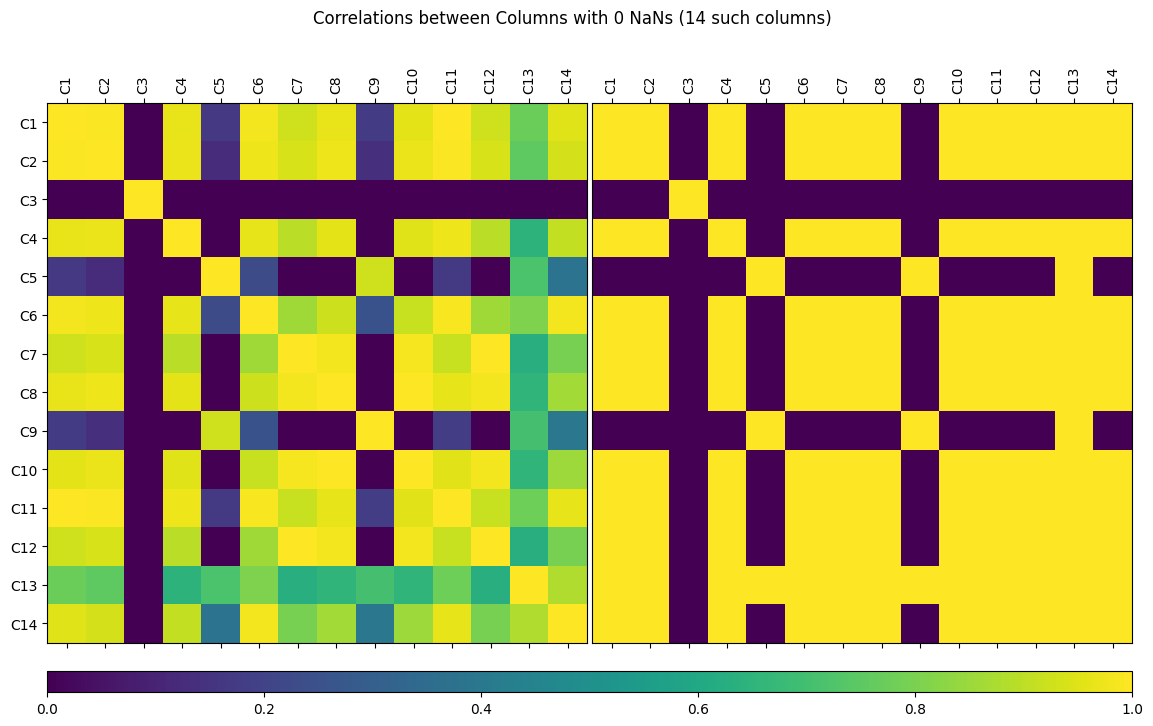

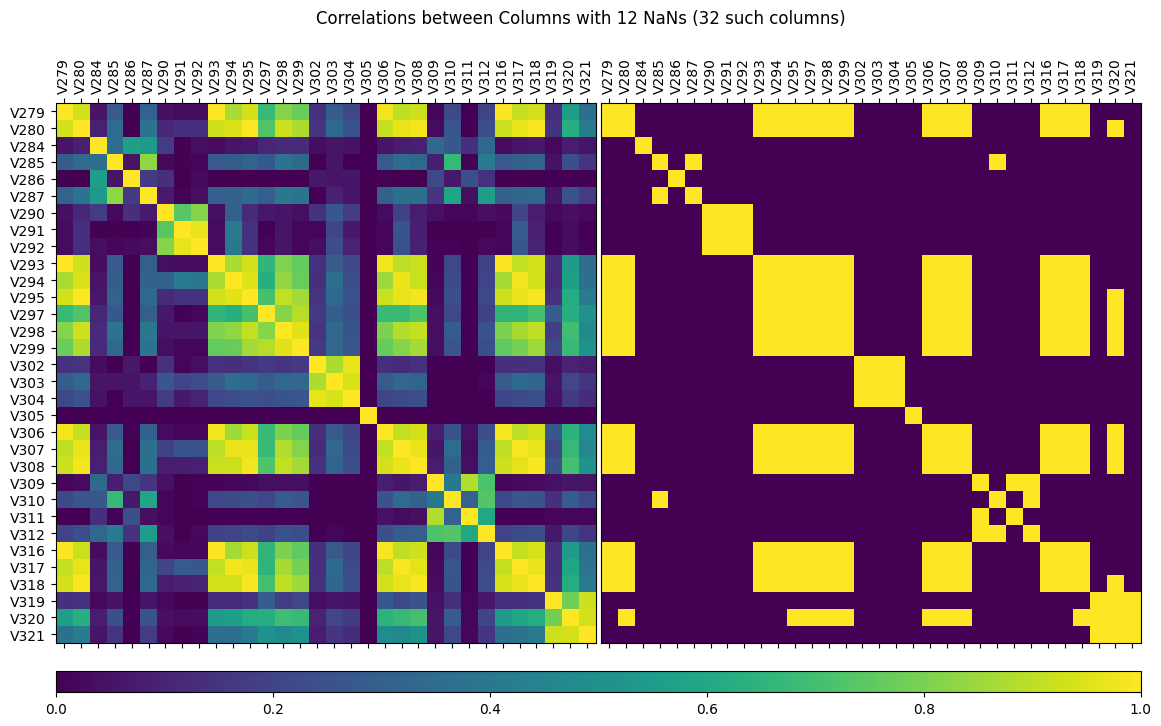

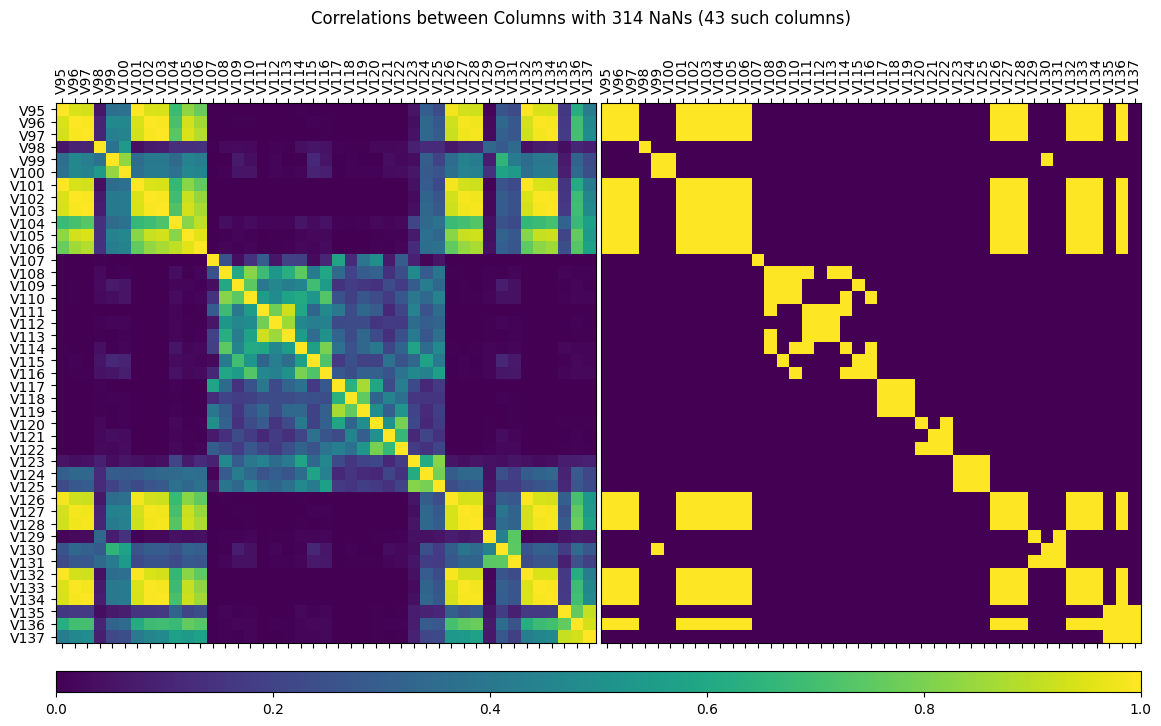

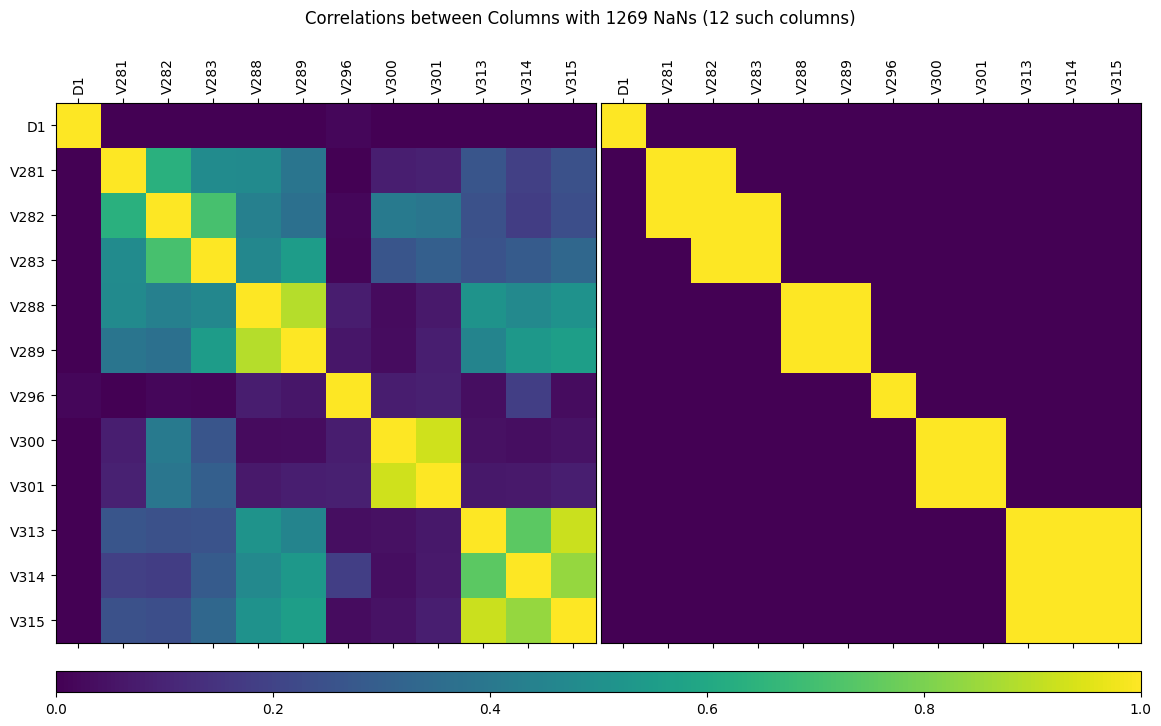

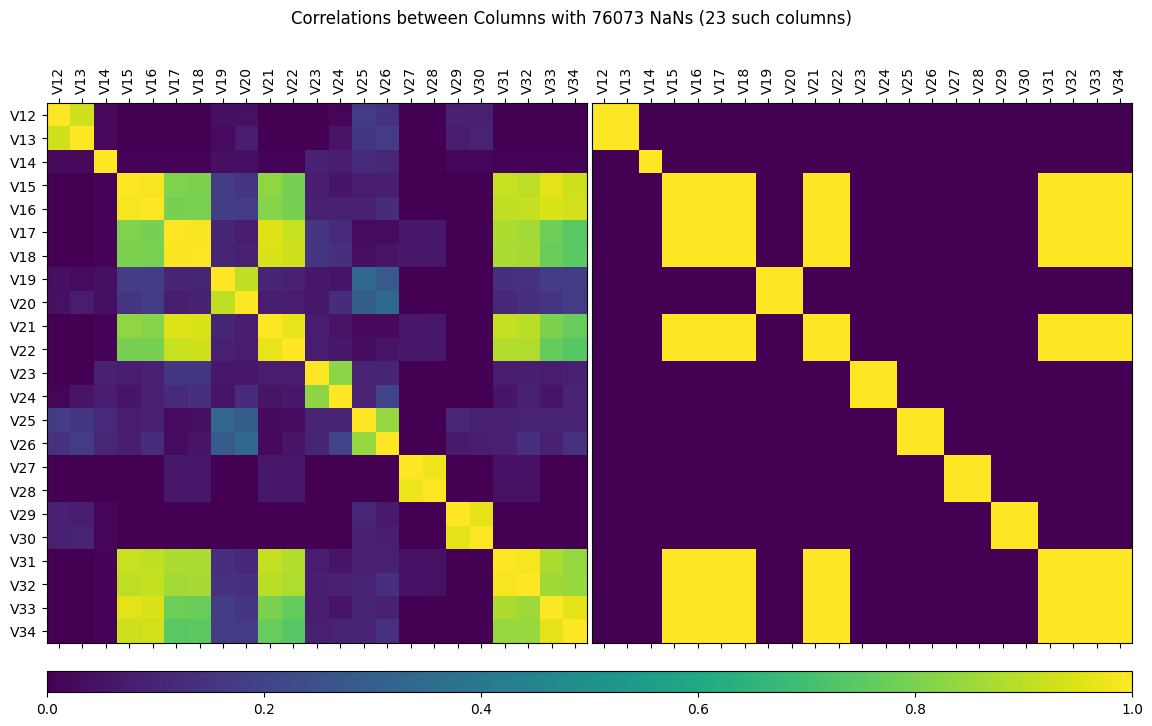

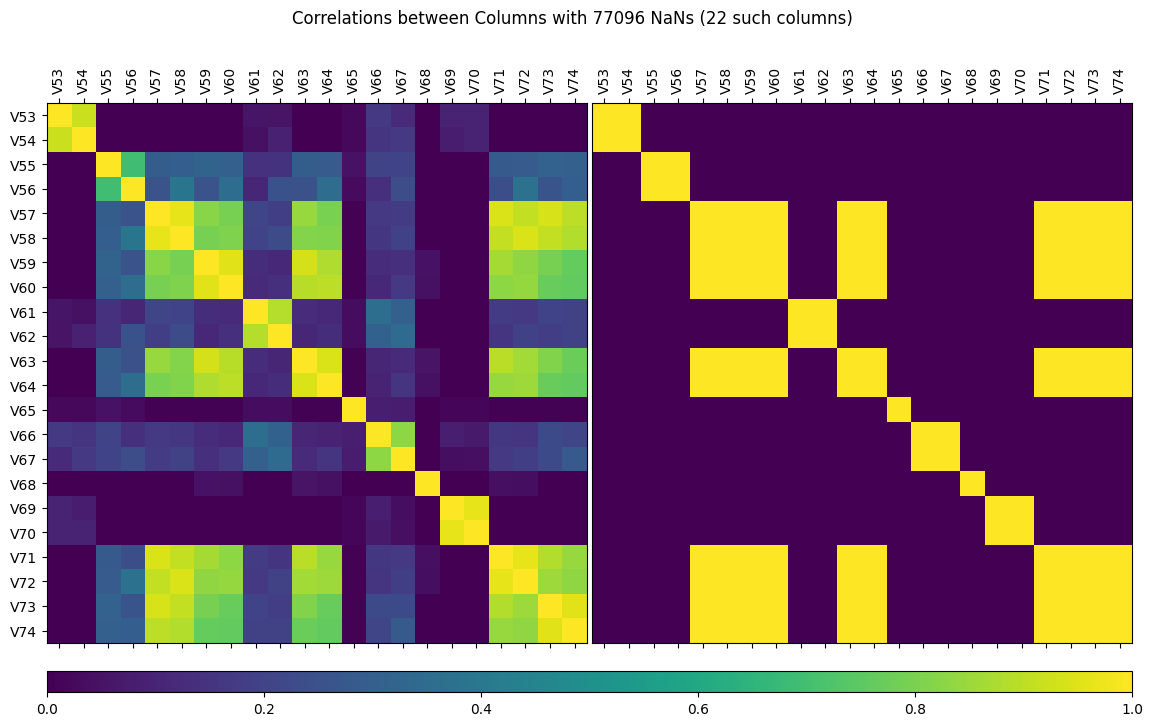

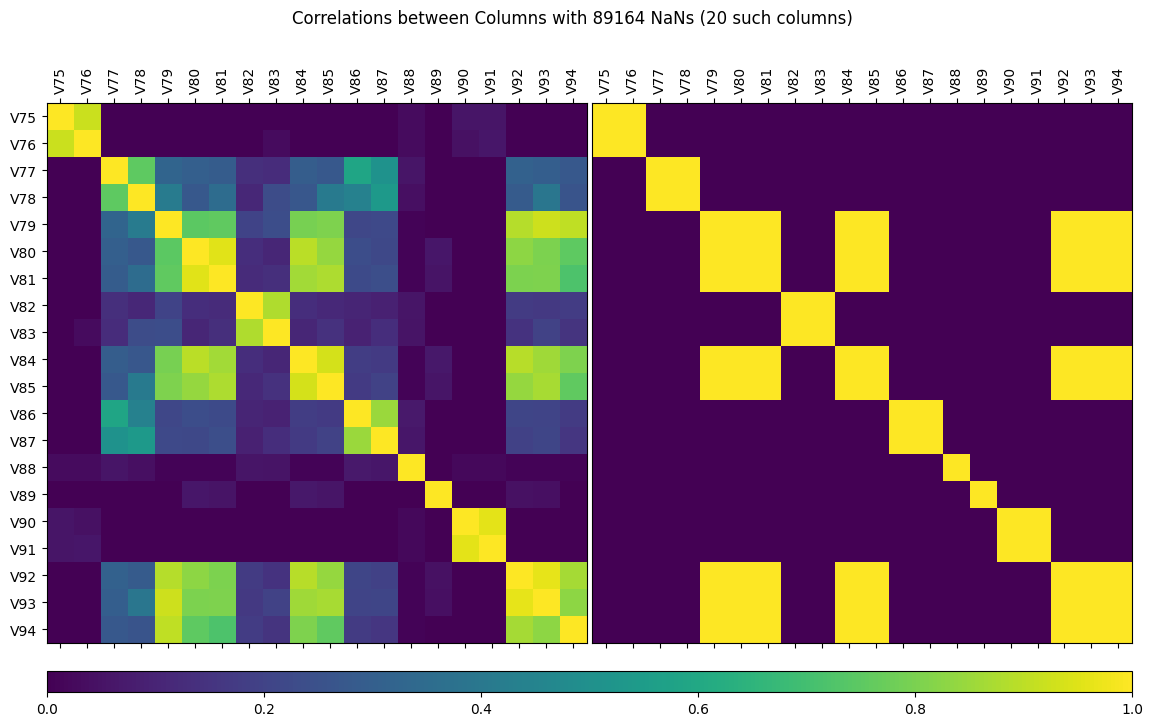

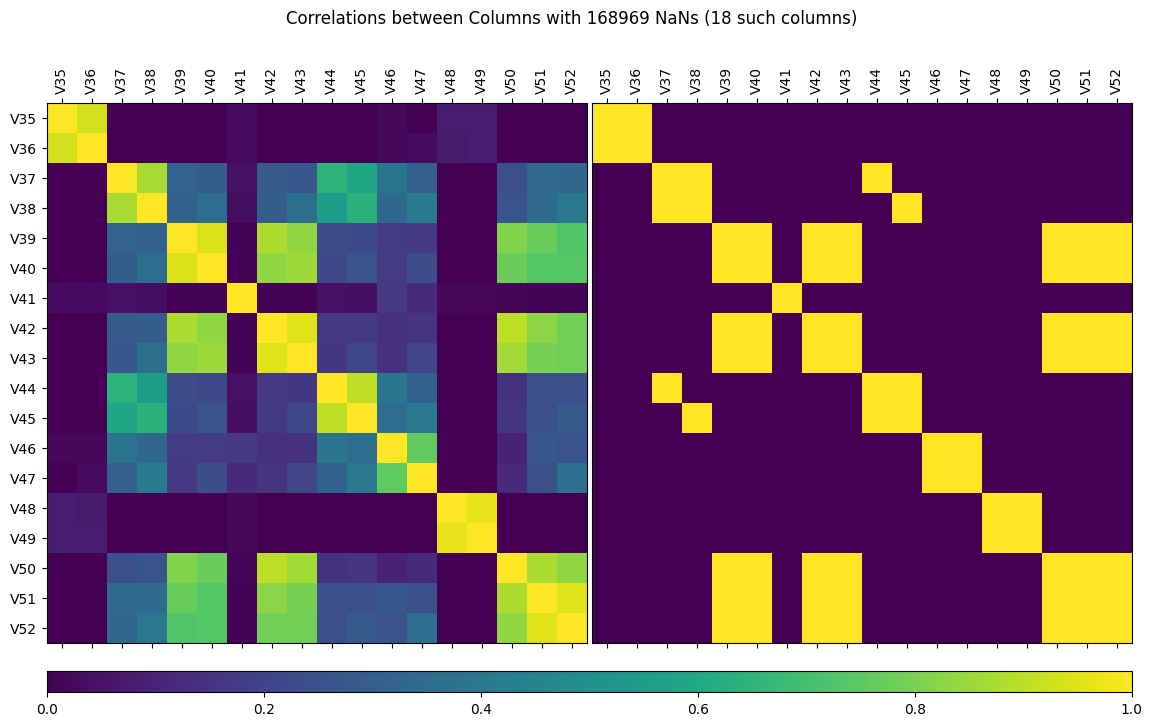

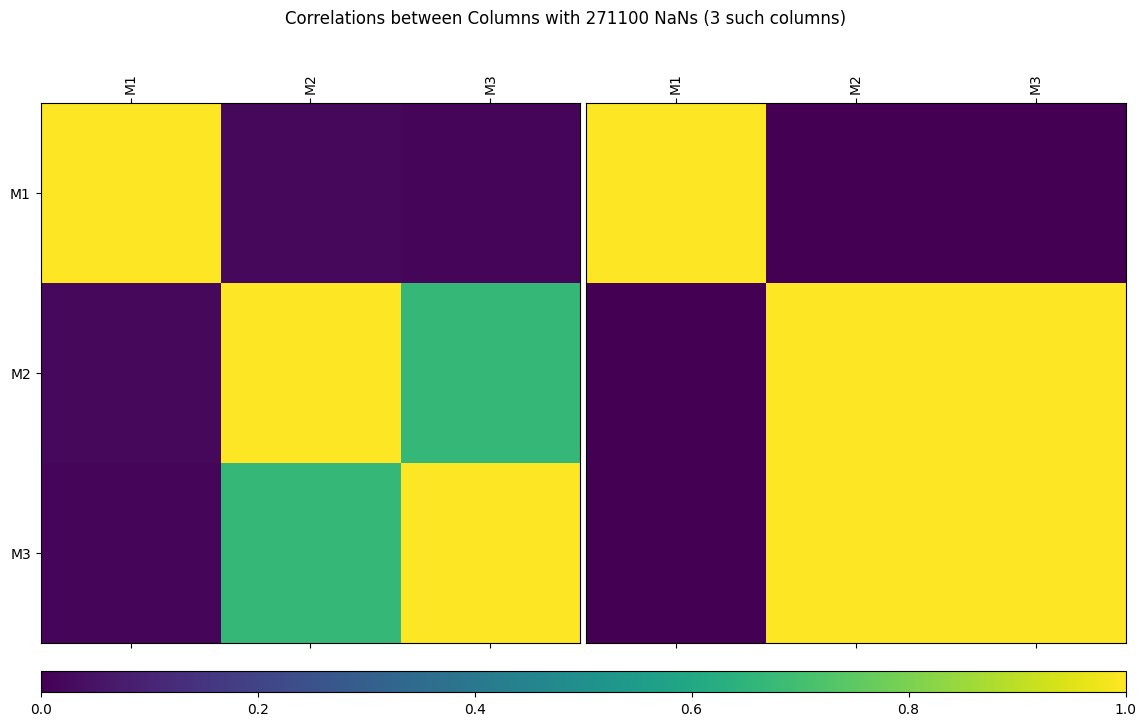

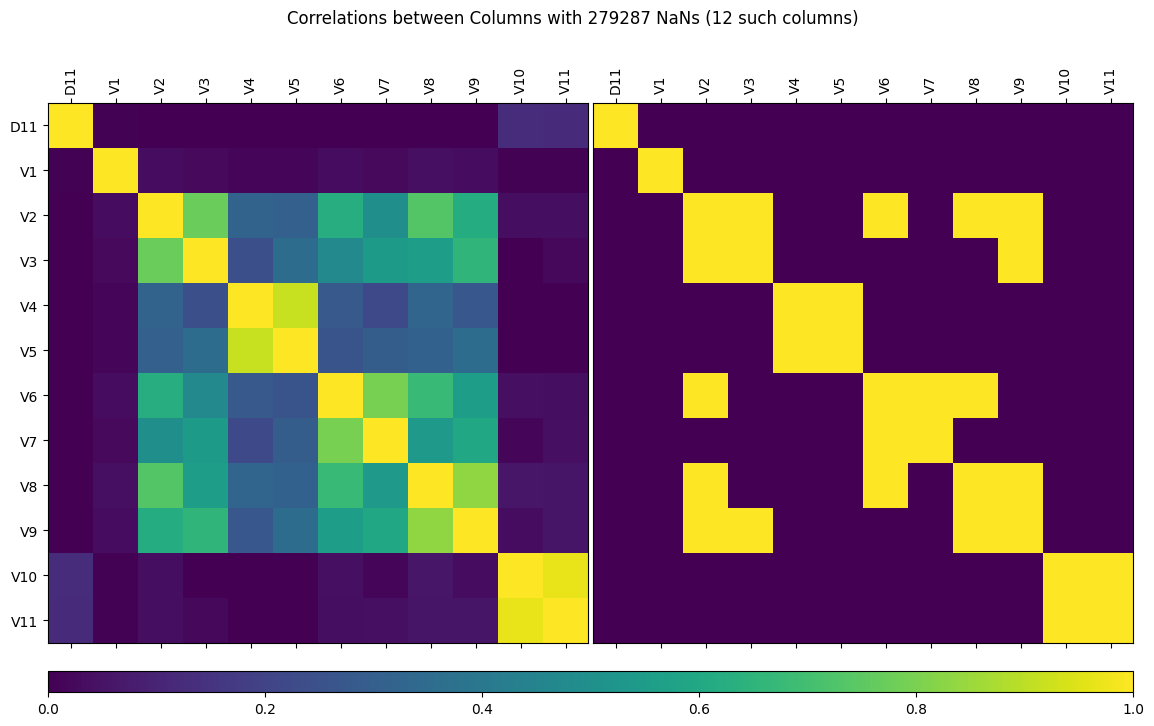

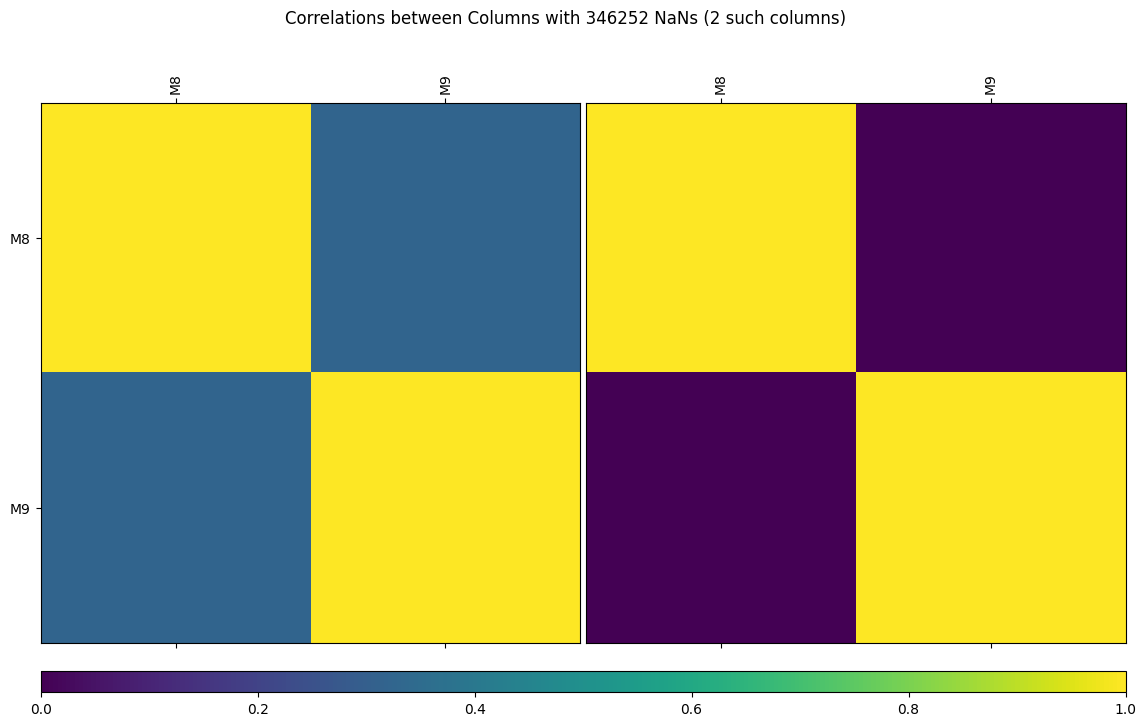

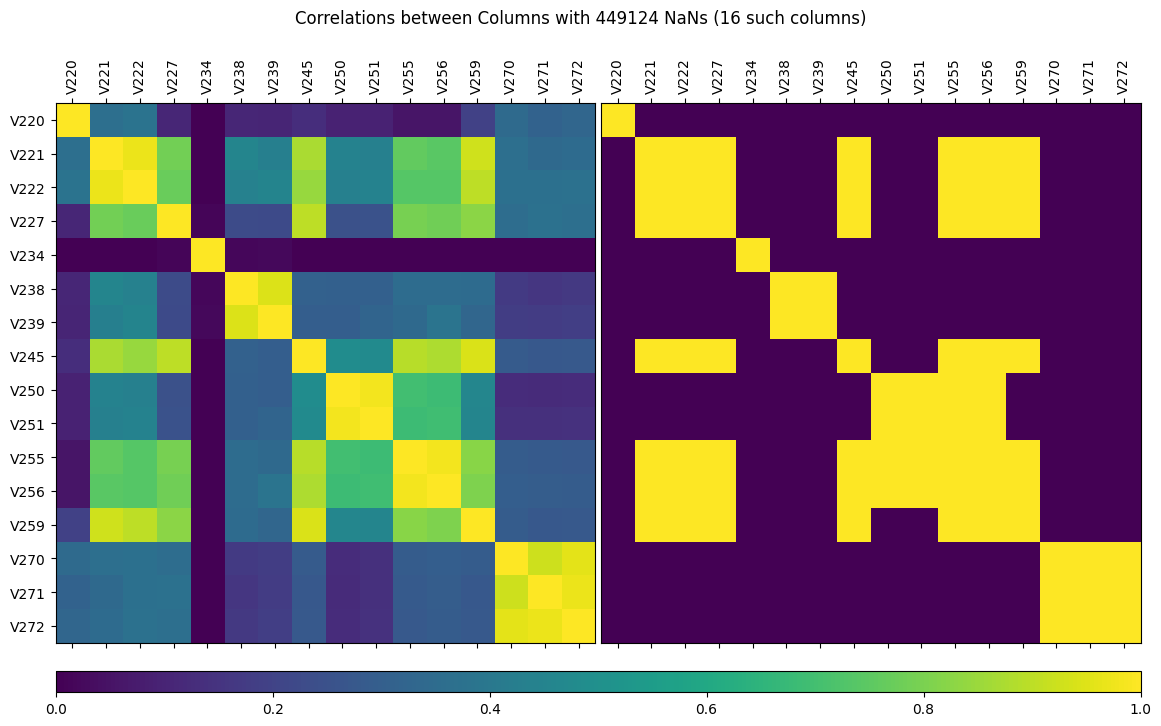

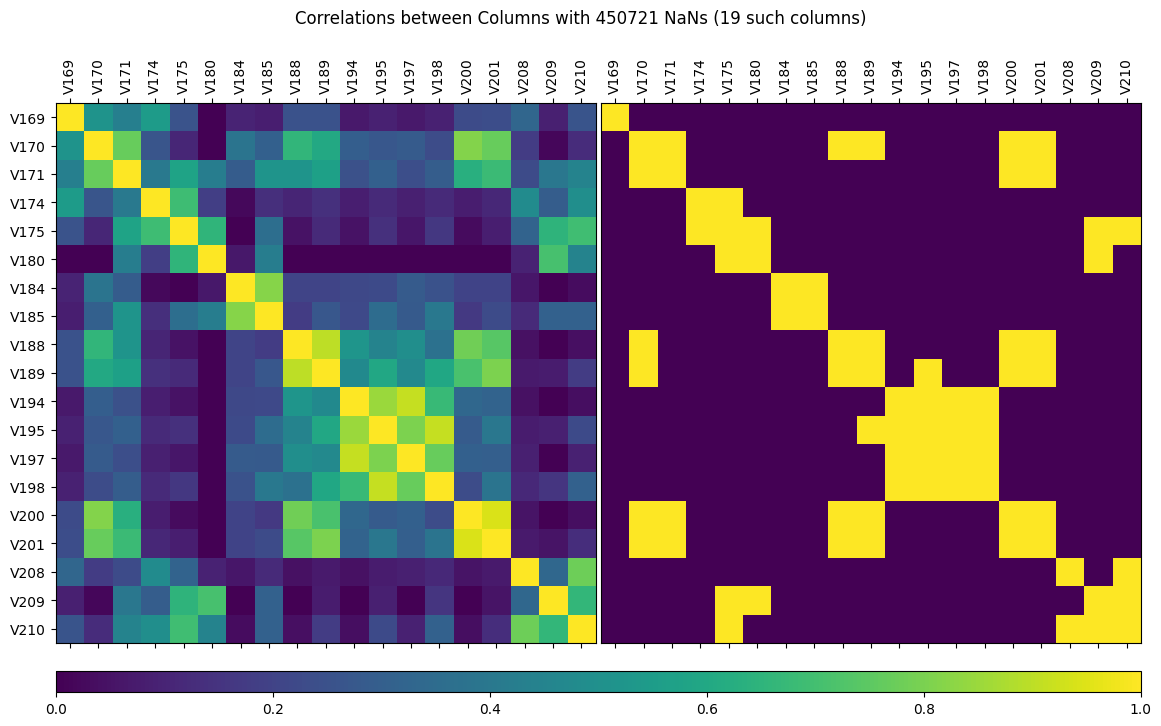

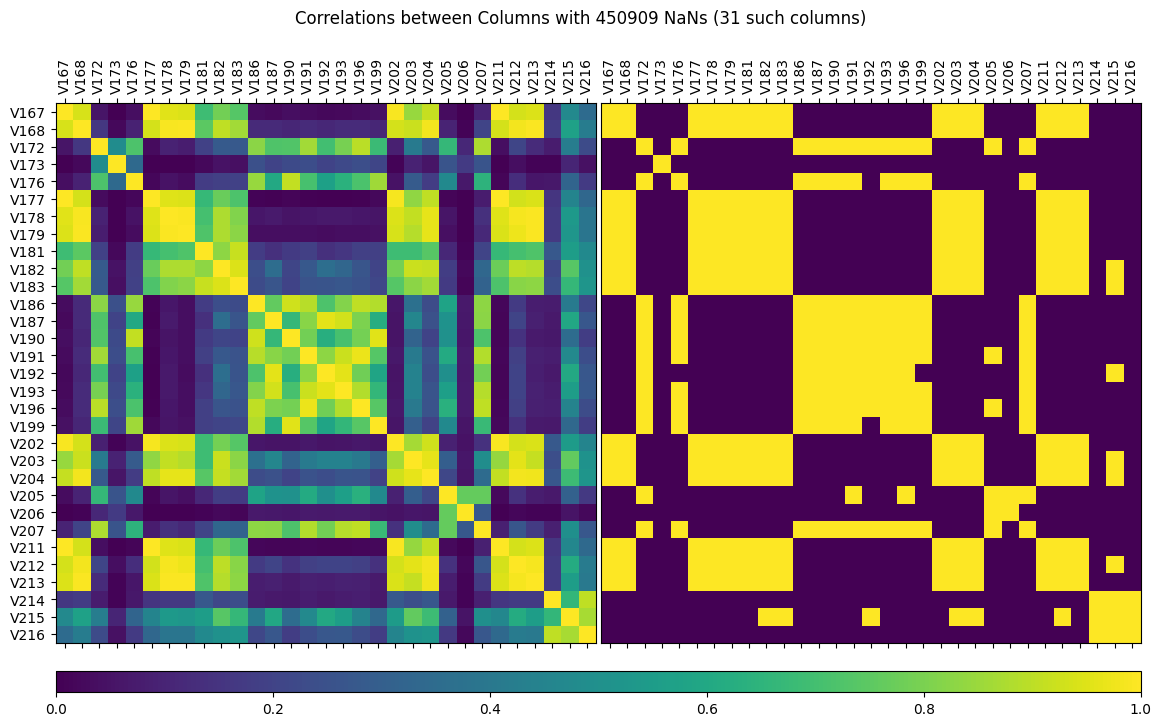

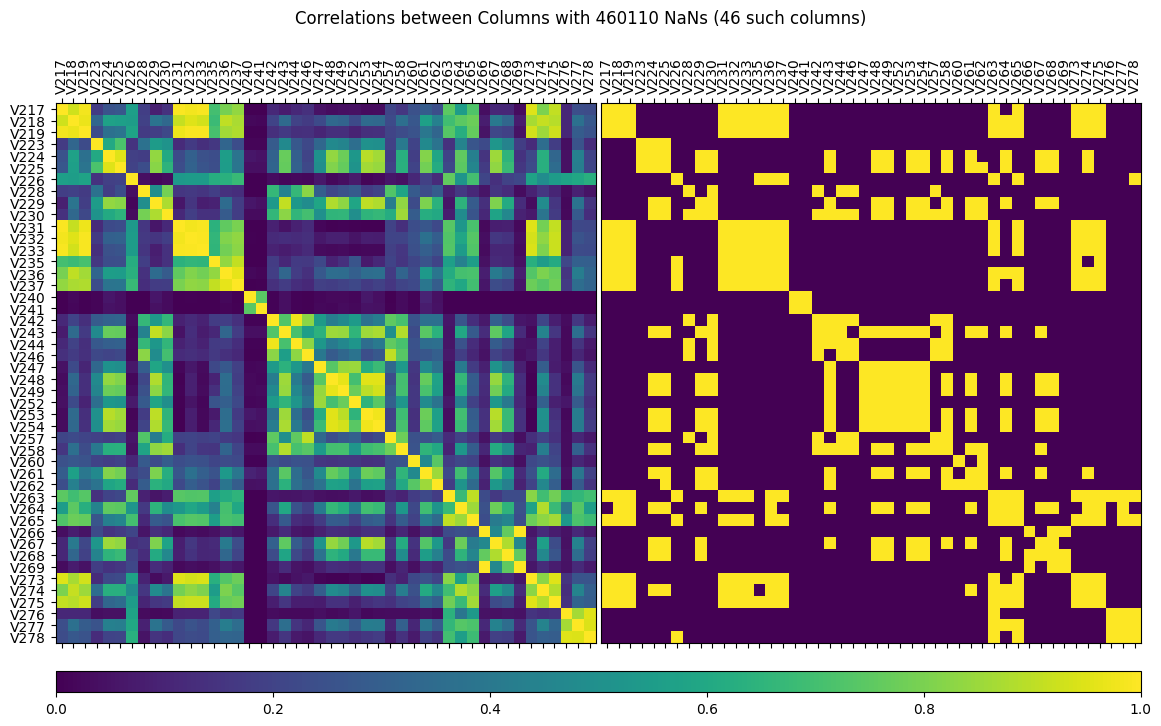

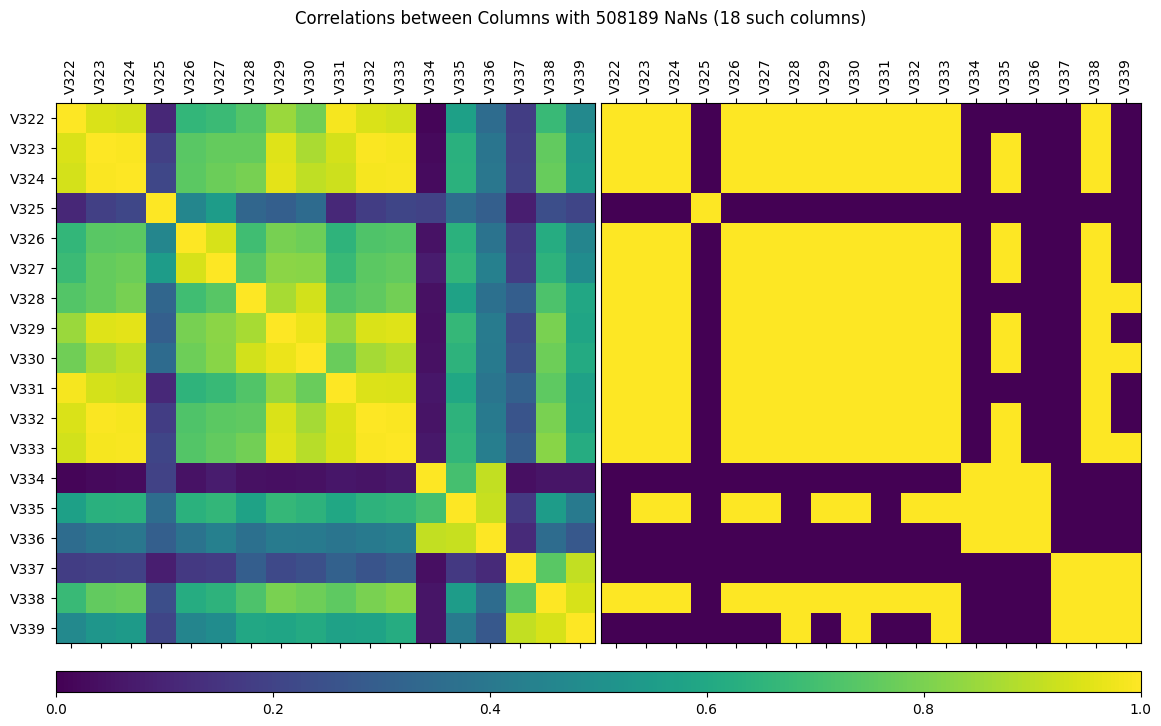

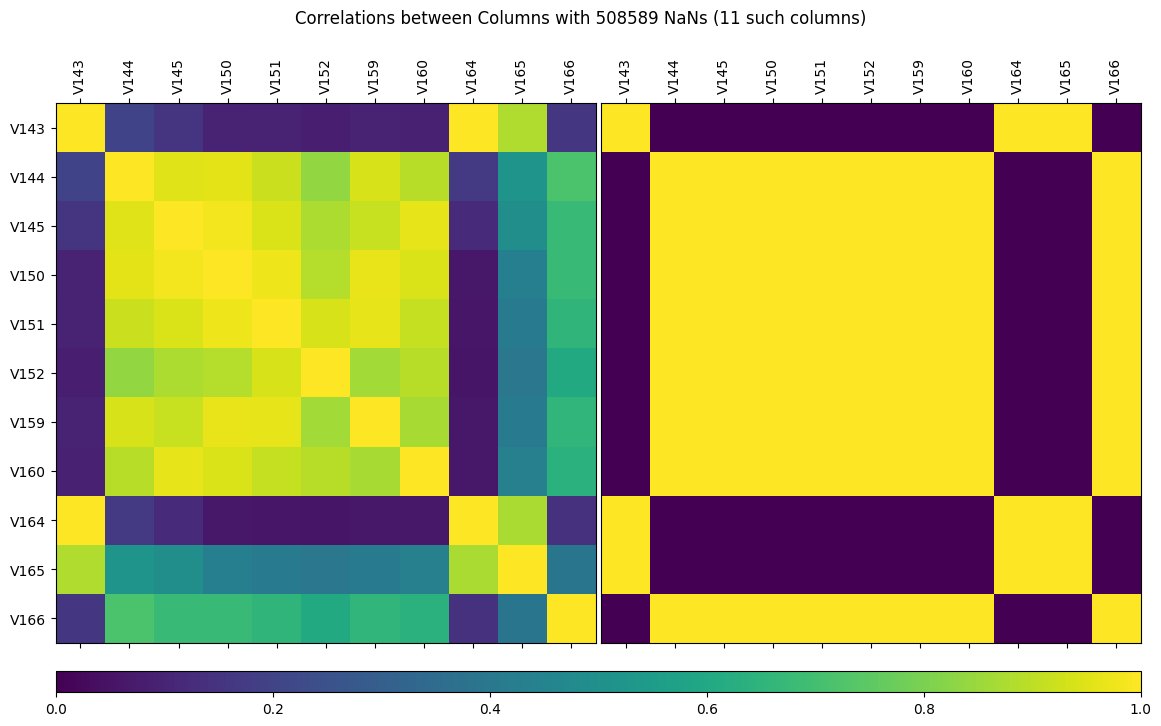

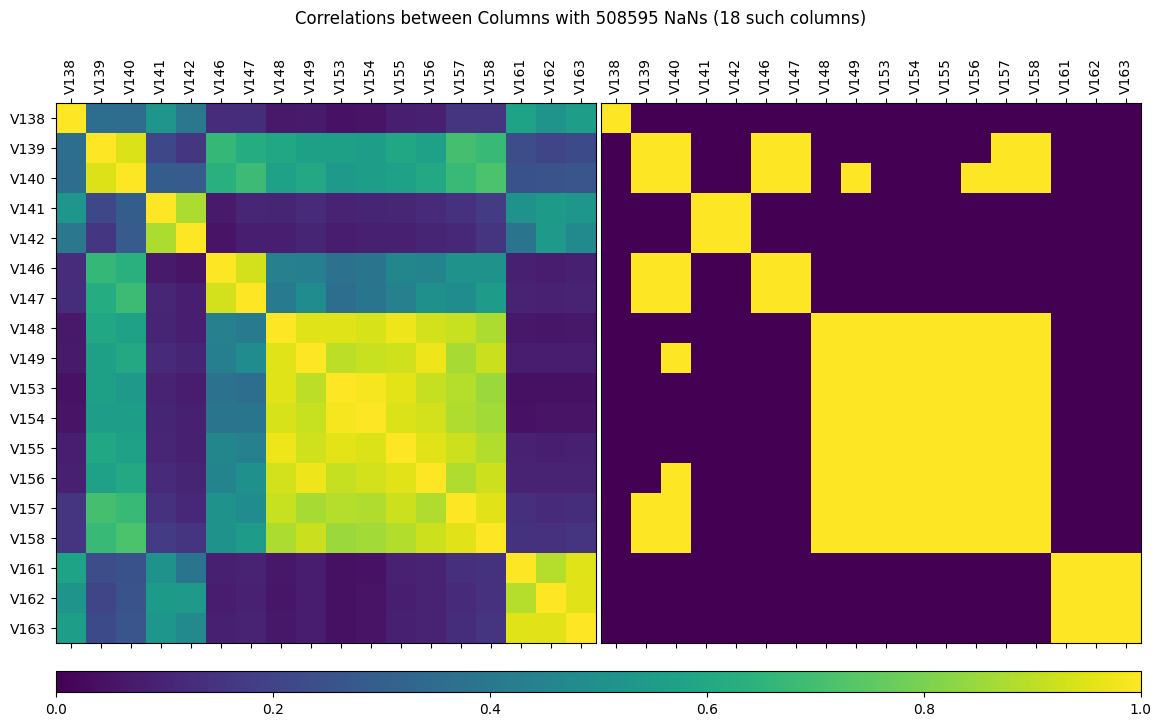

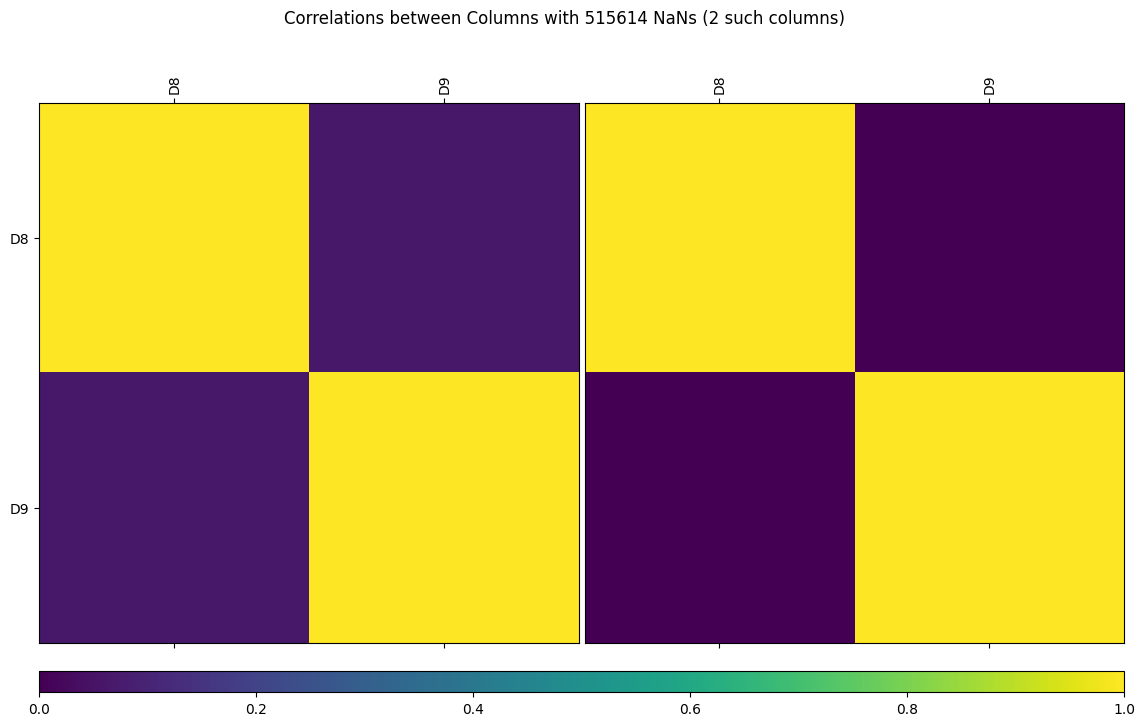

In [7]:
# Define a empty list to store all the correlation matrices
corr_mat = []
threshold = 0.6

plt.rcParams['figure.figsize'] = [14, 10]
plt.rcParams.update({'font.size': 10})
for count,names in sorted(columns_null_count.items()):
    # only looking at NaN counts involving more than 1 column
    if len(names)>1:
        # only loading in the columns with a specified NaN count
        data_in_set = df[names].dropna()
        # forming the correlation matrix 
        # this is well-defined since the NaN count is the same
        # otherwise weird operations will be considered (ie 1+NaN=NaN)
        corr_mat.append(data_in_set.corr())

        fig, (ax1, ax2) = plt.subplots(1,2)
        plt.suptitle(f'Correlations between Columns with {str(count)} NaNs ({len(names)} such columns)')
        fig.subplots_adjust(top=1.5,wspace=0.01)
        # original correlation matrix
        im1 = ax1.matshow(corr_mat[-1], vmin=0, vmax=1)
        # matrix elements satisfying the threshold
        im2 = ax2.matshow(corr_mat[-1]>threshold, vmin=0, vmax=1)
        fig.colorbar(im1, ax=[ax1,ax2],orientation='horizontal',aspect=50, pad = 0.02)

        ax1.set_xticks(np.arange(len(names), step=1))
        ax1.set_xticklabels(names,rotation=90)
        ax1.set_yticks(np.arange(len(names), step=1))
        ax1.set_yticklabels(names)
        
        ax2.set_xticks(np.arange(len(names), step=1))
        ax2.set_xticklabels(names,rotation=90)
        ax2.set_yticks([])
        ax2.set_yticklabels([])


From here on, it is a tedious manual process of choosing the features that should be further grouped together. In general, features of high correlation should be grouped together. This reduces the number of features to consider, since these features carry the same information. The intensive and manual process of this step is a potential downside.

For example, in the second-to-last figure the block diagonal structure is very clear and V161-163 can be grouped together. Automating the picking of group is difficult to accomplish systematically. Grouping them based on subjective measures (like visual cues of block-diagonal strcture) is likely easier given the relatively small number of groups.

In [27]:
pd.set_option('display.max_rows', None)

group_num = 1
for count,names in sorted(columns_null_count.items()):
    if len(names)>1:
        print(f'Group {group_num}, NaN Count: {count}, NaN Percent: {100*count/len(df):.3f} % ')
        print(names)
        group_num += 1

Group 1, NaN Count: 0, NaN Percent: 0.000 % 
['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14']
Group 2, NaN Count: 12, NaN Percent: 0.002 % 
['V279', 'V280', 'V284', 'V285', 'V286', 'V287', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V297', 'V298', 'V299', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321']
Group 3, NaN Count: 314, NaN Percent: 0.053 % 
['V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137']
Group 4, NaN Count: 1269, NaN Percent: 0.215 % 
['D1', 'V281', 'V282', 'V283', 'V288', 'V289', 'V296', 'V300', 'V301', 'V313', 'V314', 'V315']
Group 5, NaN Count: 76073, NaN P

Additional work is required for the final selection of features among the individual groups above. Another potential downside is that, since comparisons are done within the group, it does not allow for more global correlations to be quantified.